In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sweetviz as sv
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.datasets import make_imbalance
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score, f1_score
import warnings
warnings.filterwarnings("ignore")


from matplotlib import gridspec
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split,KFold, cross_val_score
from sklearn.feature_selection import RFECV
from sklearn.decomposition import PCA, KernelPCA
from sklearn import tree
from sklearn.metrics import (confusion_matrix,recall_score, make_scorer,
                    precision_score,accuracy_score,f1_score,
                    silhouette_score, completeness_score,silhouette_samples)
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans


In [64]:
# Load the data set on Australia's weather
df2 = pd.read_csv('weatherAUS.csv')
df2.head()

df2.drop(columns=['Evaporation','Evaporation','Cloud9am','Cloud3pm'], inplace=True)
df2 = df2[df2.notna()]
df2 = df2.dropna()

In [65]:
#Before splitting into test and training set, we explore the size and the class proportions in order to confirm it has the right level of imbalance
print("Shape: ", df2.shape)
#Class proportions
print("Class Proportions:\n", df2["RainTomorrow"].value_counts()/df2["RainTomorrow"].shape)

Shape:  (66646, 21)
Class Proportions:
 No     0.778126
Yes    0.221874
Name: RainTomorrow, dtype: float64


In [66]:

df2.reset_index(inplace=True)
df2.drop(columns=['index','Date'],inplace=True)

In [67]:
df2['RainTomorrow'].value_counts()

No     51859
Yes    14787
Name: RainTomorrow, dtype: int64

In [68]:
#Train-Test split into 90-10
X_2=df2.iloc[:,0:-1].copy()
Y_2=df2.iloc[:,-1].copy()
y_map = {'No':'0', 'Yes':'1'}
Y_2 = Y_2.map(y_map)
print(y_2.value_counts())

x_2=X_2.copy()
y_2=Y_2.copy()

# x2_train, x2_test, y2_train, y2_test=train_test_split(x_2,y_2, train_size=0.9, random_state=21, stratify=y_2)

0    43993
1    12427
Name: RainTomorrow, dtype: int64


In [27]:
X_2[]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM
0,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,...,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,0.0
1,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,...,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,0.0
2,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,...,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,0.0
3,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,...,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,0.0
4,2009-01-06,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,...,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,No,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56415,2017-06-20,Darwin,19.3,33.4,0.0,6.0,11.0,ENE,35.0,SE,...,63.0,32.0,1013.9,1010.5,0.0,1.0,24.5,32.3,No,0.0
56416,2017-06-21,Darwin,21.2,32.6,0.0,7.6,8.6,E,37.0,SE,...,56.0,28.0,1014.6,1011.2,7.0,0.0,24.8,32.0,No,0.0
56417,2017-06-22,Darwin,20.7,32.8,0.0,5.6,11.0,E,33.0,E,...,46.0,23.0,1015.3,1011.8,0.0,0.0,24.8,32.1,No,0.0
56418,2017-06-23,Darwin,19.5,31.8,0.0,6.2,10.6,ESE,26.0,SE,...,62.0,58.0,1014.9,1010.7,1.0,1.0,24.8,29.2,No,0.0


In [71]:
imbalanced_90_X, imbalanced_90_y = make_imbalance(X_2,Y_2, sampling_strategy={'0':39539,'1':4800})
imbalanced_90_y = imbalanced_90_y.astype(int)
x2_train, x2_test, y2_train, y2_test=train_test_split(imbalanced_90_X,imbalanced_90_y, train_size=0.90, random_state=21)

In [72]:
#We check the proportions of the sets to confirm the imbalance is preserved
print("Train Shape: ", x2_train.shape)
#Class proportions
print("Train class Proportions:\n", y2_train.value_counts()/y2_train.shape)

print("Test shape: ", x2_test.shape)
#Class proportions
print("Test class Proportions:\n", y2_test.value_counts()/y2_test.shape)

Train Shape:  (39905, 19)
Train class Proportions:
 0    0.890791
1    0.109209
Name: RainTomorrow, dtype: float64
Test shape:  (4434, 19)
Test class Proportions:
 0    0.900316
1    0.099684
Name: RainTomorrow, dtype: float64


In [73]:
#Bootstraping mean
def boostrap_mean(sample, sample_size, n_iterations):
	bootstrap_samples=np.random.choice(sample, size=(n_iterations,sample_size), replace=True)
	mean_array=np.mean(bootstrap_samples, axis=1)
	data_mean=np.mean(mean_array)
	lower=np.percentile(mean_array,2.5)
	upper=np.percentile(mean_array,97.5)
	return data_mean, lower, upper

#Bootstraping standard deviation
def boostrap_std(sample, sample_size, n_iterations):
	bootstrap_samples=np.random.choice(sample, size=(n_iterations,sample_size), replace=True)
	std_array=np.std(bootstrap_samples, axis=1)
	data_std=np.mean(std_array)
	return data_std

#Distance function from the Total within-cluster sum of sqaures to the arch. Used during the Elbow method 
def calc_distance(x1,y1,a,b,c):
  d=abs(a*x1+b*y1+c)/((a*a+b*b)**0.5)
  return d
	
#permutation test: mean difference	p-value
def permutation_test(array1, array2, n_iterations):
  results=[]
  current_mean=np.mean(array1)
  new_mean=np.mean(array2)
  t_obs=new_mean-current_mean
  concat = np.concatenate((array1, array2))
  for i in range(n_iterations):    
    perm = np.random.permutation(concat)
    pcurrent= perm[:len(array1)]
    pnew= perm[len(array1):]
    t_perm=np.mean(pnew)-np.mean(pcurrent)
    if t_perm>t_obs:
      results.append(1)
    else:
      results.append(0)
  p_value=np.sum(results)/n_iterations
  return(p_value)

In [74]:
#list of numerical variables
categorical=["Date", "Location","WindGustDir", "WindDir9am","WindDir3pm","RainToday"]
x2_train.loc[:, ~x2_train.columns.isin(categorical)].astype(int).describe().transpose()
numerical= x2_train.columns[~x2_train.columns.isin(categorical)]

# Random Forest Baseline

In [75]:
#We use the same folds from this point on
k_fold = KFold(n_splits=10)
#Empty lists to store results
accuracy_base=[]
f1_base=[]
g_mean_base=[]
metrics_base={"accuracy": accuracy_base, "f1:": f1_base, "g-mean": g_mean_base}

#baselines
rf_base=  RandomForestClassifier(500, random_state=21)
clf=[rf_base]

#10-fold cross validation trhough each baseline
for c in clf:
  c_name=c.__class__.__name__
  print("Classifier: %s" % c_name)
  for train_indices, test_indices in k_fold.split(x2_train[numerical]):
    scaler = StandardScaler()
    #Train-validation split using best features
    x2_train_f=x2_train[numerical].iloc[train_indices,:].copy()
    x2_train_f=scaler.fit_transform(x2_train_f[:])
    y2_train_f=y2_train.iloc[train_indices].copy()
    x2_val_f=x2_train[numerical].iloc[test_indices,:].copy()
    x2_val_f=scaler.transform(x2_val_f[:])
    y2_val_f=y2_train.iloc[test_indices].copy()
  
    #training baseline
    c.fit(x2_train_f, y2_train_f)
       
    #predicting class and computing metrics
    y_hat=c.predict(x2_val_f)
    f1_f=f1_score(y2_val_f,y_hat)
    acc_f=accuracy_score(y2_val_f,y_hat)
    pr_r=precision_score(y2_val_f,y_hat)
    rec_f=recall_score(y2_val_f,y_hat)
    gmean_f=(pr_r*rec_f)**(0.5)

    #appending to results
    accuracy_base.append([acc_f,c.__class__.__name__])
    f1_base.append([f1_f,c.__class__.__name__])
    g_mean_base.append([gmean_f,c.__class__.__name__])
  
  #printing results for each baseline
  for m, v in metrics_base.items():
    mean,l,u=boostrap_mean(np.array(v)[np.array(v)[:,1]==c_name][:,0].astype(float), \
                          len(np.array(v)[np.array(v)[:,1]==c_name][:,0].astype(float)),10000)
    std=boostrap_std(np.array(v)[np.array(v)[:,1]==c_name][:,0].astype(float), \
                          len(np.array(v)[np.array(v)[:,1]==c_name][:,0].astype(float)),10000)
    print("%s \nmean: %0.4f, lower: %0.4f, upper: %0.4f, std: %0.4f " % (m,mean, l,u,std))
  print("\n")

Classifier: RandomForestClassifier
accuracy 
mean: 1.0000, lower: 0.9999, upper: 1.0000, std: 0.0001 
f1: 
mean: 0.9999, lower: 0.9997, upper: 1.0000, std: 0.0002 
g-mean 
mean: 0.9999, lower: 0.9997, upper: 1.0000, std: 0.0003 




# Cluster Analysis

In [76]:
#defining maximum number of clusters
kmax=5
#creating empty lists to store results
accuracy_cluster=[]
f1_cluster=[]
g_mean_cluster=[]
metrics_cluster={"accuracy": accuracy_cluster, "f1:": f1_cluster, "g-mean": g_mean_cluster}

#10-fold CV for cluster-based method
i=1 #iterator variable
for train_indices, test_indices in k_fold.split(x2_train):
  print("Fold: %s" % i) #control message
  #Training-validation split
  x2_train_f=x2_train[numerical].iloc[train_indices].copy()
  x2_train_f[:]=scaler.fit_transform(x2_train_f[:])
  y2_train_f=y2_train.iloc[train_indices].copy()
  x2_val_f=x2_train[numerical].iloc[test_indices].copy()
  x2_val_f[:]=scaler.transform(x2_val_f[:])
  y2_val_f=y2_train.iloc[test_indices].copy()

  #####################################
  #Optimal number of clusters selection
  #####################################
  k_optimal=[]  #empty list to store results from each method
  wss=[]  #empty list for sum of squares
  silhouette_avg=[] #empty list for silhouette score

  #compute 'kmax' different clusters
  for k in range(1,kmax+1):
    kmeans = KMeans(n_clusters=k, random_state=21)  #defining algorithm
    cluster=kmeans.fit_predict(x2_train_f)  #fit kmeans
    #append silhouette score >1 as for k=1 it is not defined
    if k!=1:
      sil=silhouette_score(x2_train_f, cluster)
      silhouette_avg.append(sil)
    #append sum of squares
    wss.append(kmeans.inertia_)

  ################
  #Elbow Method
  ################
  #Rescale sum of squares
#   wss=(wss-min(wss))/(max(wss)-min(wss))

  #defining variables to compute distance from sum of squares curve
  #to the arch connecting both extremes (see plot below)
  a=wss[0]-wss[-1]
  b=list(range(1,kmax+1))[-1]-list(range(1,kmax+1))[0]
  c1=list(range(1,kmax+1))[0]*wss[-1]
  c2=list(range(1,kmax+1))[-1]*wss[0]
  c=c1-c2

  #computing distance from sum of squares curve to the arch
  distance=[]
  for k in range(kmax):
    distance.append(calc_distance(list(range(1,kmax+1))[k],wss[k],a,b,c))
  #appending optimal K based on the elbow method
  k_optimal.append(list(range(1,kmax+1))[np.argmax(distance)])

 ###################
  #Silhouette Method 
  ################## 
  #appending optimal K as that with the maximum silhouette score
  k_optimal.append(list(range(2,kmax+1))[np.argmax(silhouette_avg)])

  #choosing the max between the two methods (as it yields better results
  #than selecting the min)
  k_optimal=max(k_optimal)
  print("Best k: %s" % k_optimal) #print optimal K

  ################
  #Learning stage
  ################
  #defining kmeans algorithm
  kmeans = KMeans(n_clusters=k_optimal, random_state=21)
  cluster=kmeans.fit_predict(x2_train_f)   #fitting kmeans algorithm

  #checking whether all clusters have instances from the same class
  i2=0  #iterator
  rf={} #empty dictionary to store Random Forest classifieres
  #iterating through the clusters
  for k in range(k_optimal):
    #checking if cluster is 'complete' (instances from same class)
    if (y2_train_f[cluster==k].unique().shape[0]==1) is False:
      #defining classifier and storing it in the dictionary
      rf['rf_{0}'.format(k)] = RandomForestClassifier(500, random_state=21)
      #training classifier
      rf[list(rf.keys())[i2]].fit(x2_train_f[cluster==k],y2_train_f[cluster==k])
      i2+=1 #increasing iterator

  ##################
  #predicting Stage
  ##################
  #fitting kmeans on validation set previoulsy trained using training set
  y_hat=kmeans.predict(x2_val_f)
  i3=0  #iterator
  #Loop through clusters to check if it has instances from the same class
  for k in range(k_optimal):
    if (y2_train_f[cluster==k].unique().shape[0]==1) is True:
      #if it is complete, assign the corresponding class to the validation instances in that cluster
      y_hat[y_hat==k]=np.mean(y2_train_f[cluster==k])
    else:
      #if not use the pre-trained classifier to predict the class
      y_hat[y_hat==k]=rf[list(rf.keys())[i3]].predict(x2_val_f[y_hat==k])
      i3+=1 #increase iterator
  
  #computing metrics
  f1_f=f1_score(y2_val_f,y_hat)
  acc_f=accuracy_score(y2_val_f,y_hat)
  pr_r=precision_score(y2_val_f,y_hat)
  rec_f=recall_score(y2_val_f,y_hat)
  gmean_f=(pr_r*rec_f)**(0.5)

  #appending metrics to lists
  accuracy_cluster.append([acc_f,i])
  f1_cluster.append([f1_f,i])
  g_mean_cluster.append([gmean_f,i])
  i+=1 

print("\n") 
#printing results
for m, v in metrics_cluster.items():
  mean,l,u=boostrap_mean(np.array(v)[:,0].astype(float), \
                        len(np.array(v)[:,0].astype(float)),10000)
  std=boostrap_std(np.array(v)[:,0].astype(float), \
                        len(np.array(v)[:,0].astype(float)),10000)
  print("%s \nmean: %0.4f, lower: %0.4f, upper: %0.4f, std: %0.4f " % (m,mean, l,u,std))

Fold: 1
Best k: 2
Fold: 2
Best k: 2
Fold: 3
Best k: 2
Fold: 4
Best k: 2
Fold: 5
Best k: 2
Fold: 6
Best k: 2
Fold: 7
Best k: 2
Fold: 8
Best k: 2
Fold: 9
Best k: 2
Fold: 10
Best k: 2


accuracy 
mean: 1.0000, lower: 0.9999, upper: 1.0000, std: 0.0001 
f1: 
mean: 0.9999, lower: 0.9997, upper: 1.0000, std: 0.0002 
g-mean 
mean: 0.9999, lower: 0.9997, upper: 1.0000, std: 0.0003 


F1 Score Mean Difference: Cluster-RF vs RandomForestClassifier:
Difference: 0.0000, p-value: 0.2400
G-mean Score Mean Difference: Cluster-RF vs RandomForestClassifier:
Difference: 0.0000, p-value: 0.2590
Accuracy Mean Difference: Cluster-RF vs RandomForestClassifier:
Difference: 0.0000, p-value: 0.2040
Best k: 2
Test accuracy: 1.0000
Test f1:: 1.0000
Test g-mean: 1.0000


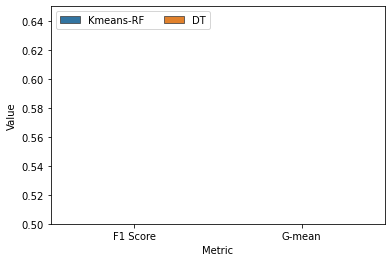

In [78]:
## 4. Permutation Test

### A) F1 Score

base=["RandomForestClassifier"] #lists with baselines

#compare our method against baselines
for b in base:
  print("F1 Score Mean Difference: Cluster-RF vs %s:" % b)  #message
  cluster=np.array(f1_cluster)[:,0] #getting results from our method
  base=np.array(f1_base)[np.array(f1_base)[:,1]==b][:,0].astype(float) #baselines results
  diff=np.mean(cluster)-np.mean(base) #computing mean difference
  p_value=permutation_test(base,cluster,1000) #estimating p-value
  print("Difference: %0.4f, p-value: %0.4f" % (diff, p_value))  #printing p-value

### B) G-mean 

base=["RandomForestClassifier"]#lists with baselines

#compare our method against baselines
for b in base:
  print("G-mean Score Mean Difference: Cluster-RF vs %s:" % b)  #message
  cluster=np.array(g_mean_cluster)[:,0] #getting results from our method
  base=np.array(g_mean_base)[np.array(g_mean_base)[:,1]==b][:,0].astype(float)  #baselines results
  diff=np.mean(cluster)-np.mean(base) #computing mean difference
  p_value=permutation_test(base,cluster,1000) #estimating p-value
  print("Difference: %0.4f, p-value: %0.4f" % (diff, p_value))  #printing p-value

### C) Accuracy

base=["RandomForestClassifier"]  #lists with baselines

#compare our method against baselines
for b in base:
  print("Accuracy Mean Difference: Cluster-RF vs %s:" % b)  #message
  cluster=np.array(accuracy_cluster)[:,0]  #getting results from our method
  base=np.array(accuracy_base)[np.array(accuracy_base)[:,1]==b][:,0].astype(float)  #baselines results
  diff=np.mean(cluster)-np.mean(base) #computing mean difference
  p_value=permutation_test(base,cluster,1000) #estimating p-value
  print("Difference: %0.4f, p-value: %0.4f" % (diff, p_value))  #printing p-value

#converting results to data frames to plot them

m_t=pd.DataFrame([])  #empty data frame
#iterating through cluster-based method results
for m, v in metrics_cluster.items():
  if m!="accuracy":
    m_i=pd.DataFrame(v) #converting results to dataframe
    m_i["metric"]=m #adding results
    m_i.iloc[:,1]="cluster" #indicator column
    m_t=pd.concat([m_t,m_i], ignore_index=True) #appending to empy dataframe

#iterating through baseline results
for m, v in metrics_base.items():
  if m!="accuracy":
    m_i=pd.DataFrame(v) #converting results to dataframe
    m_i["metric"]=m  #adding results
    m_t=pd.concat([m_t,m_i], ignore_index=True) #appending to empy dataframe
 

# #Plotting results
plot=sns.boxplot(m_t.iloc[:,2],m_t.iloc[:,0], hue=m_t.iloc[:,1],
                 data=m_t)

handles, _ = plot.get_legend_handles_labels()

plt.legend( title="", fontsize='small', fancybox=True)
plot.legend(handles, ["Kmeans-RF", "DT", "RF"],ncol=3,loc='upper left')
plot.set(xlabel='Metric', ylabel='Value') #labeling axis
plot.set_xticks(range(m_t.iloc[:,2].unique().shape[0])) # <--- set the ticks first
plot.set_xticklabels(["F1 Score", "G-mean"])
#plot.set_yscale('log')
#plot.yaxis.set_major_formatter(matplotlib.ticker.ScalarFormatter())
#plot.set_yticks([0.5,0.55, 0.6])
plot.set_ylim((.5,.65))
plt.savefig("weather_box.png", bbox_inches='tight') #saving figure

### 5. Test Set Results


#####################################
#Optimal number of clusters selection
#####################################
k_optimal=[]  #empty list to store results from each method
wss=[]  #empty list for sum of squares
silhouette_avg=[] #empty list for silhouette score
#Iterating thorugh the maximum number of clusters to be tested
for k in range(1,kmax+1):
  kmeans = KMeans(n_clusters=k, random_state=21)
  cluster=kmeans.fit_predict(x2_train[numerical])
  if k!=1:
      sil=silhouette_score(x2_train[numerical], cluster)
      silhouette_avg.append(sil)
  wss.append(kmeans.inertia_)

#Elbow Method
#Rescale sum of squares
# wss=(wss-min(wss))/(max(wss)-min(wss))
#defining variables to compute distance from sum of squares curve
#to the arch connecting both extremes (see plot below)
a=wss[0]-wss[-1]
b=list(range(1,kmax+1))[-1]-list(range(1,kmax+1))[0]
c1=list(range(1,kmax+1))[0]*wss[-1]
c2=list(range(1,kmax+1))[-1]*wss[0]
c=c1-c2

#computing distance from sum of squares curve to the arch
distance=[]
for k in range(kmax):
  distance.append(calc_distance(list(range(1,kmax+1))[k],wss[k],a,b,c))
#appending optimal K based on the elbow method
k_optimal.append(list(range(1,kmax+1))[np.argmax(distance)])

###################
#Silhouette Method 
################## 
#appending optimal K as that with the maximum silhouette score
k_optimal.append(list(range(2,kmax+1))[np.argmax(silhouette_avg)])

#choosing the max between the two methods (as it yields better results
#than selecting the min)
k_optimal=max(k_optimal)
print("Best k: %s" % k_optimal) #print optimal K

################
#Learning stage
################
#defining kmeans algorithm
kmeans = KMeans(n_clusters=k_optimal, random_state=21)
cluster=kmeans.fit_predict(x2_train[numerical])

#checking whether all clusters have instances from the same class
i2=0  #iterator
rf={} #empty dictionary to store Random Forest classifieres
#iterating through the clusters
for k in range(k_optimal):
  #checking if cluster is 'complete' (instances from same class)
  if (y2_train[cluster==k].unique().shape[0]==1) is False:
    #defining classifier and storing it in the dictionary
    rf['rf_{0}'.format(k)] = RandomForestClassifier(500, random_state=21)
    #training classifier
    rf[list(rf.keys())[i2]].fit(x2_train[numerical].iloc[cluster==k],y2_train[cluster==k])
    i2+=1

##################
#predicting Stage
##################
#fitting kmeans on validation set previoulsy trained using training set
y_hat=kmeans.predict(x2_test[numerical])
i3=0#iterator
#Loop through clusters to check if it has instances from the same class
for k in range(k_optimal):
  #checking if cluster is 'complete'
  if (y2_train[cluster==k].unique().shape[0]==1) is True:
    #if it is complete, assign the corresponding class to the validation instances in that cluster
    y_hat[y_hat==k]=np.mean(y2_train[cluster==k])
  else:
    #if not use the pre-trained classifier to predict the class
    y_hat[y_hat==k]=rf[list(rf.keys())[i3]].predict(x2_test[numerical].iloc[y_hat==k])
    i3+=1

#computing metrics
f1_t=f1_score(y2_test,y_hat)
acc_t=accuracy_score(y2_test,y_hat)
pr_t=precision_score(y2_test,y_hat)
rec_t=recall_score(y2_test,y_hat)
gmean_t=(pr_t*rec_t)**(0.5)

#pritning results
metrics_test={"accuracy": acc_t, "f1:": f1_t, "g-mean": gmean_t}
for m, v in metrics_test.items():
  print("Test %s: %0.4f" % (m,v))

In [82]:
#####################################
#Optimal number of clusters selection
#####################################
k_optimal=[]  #empty list to store results from each method
wss=[]  #empty list for sum of squares
silhouette_avg=[] #empty list for silhouette score
#Iterating thorugh the maximum number of clusters to be tested
for k in range(1,kmax+1):
  kmeans = KMeans(n_clusters=k, random_state=21)
  cluster=kmeans.fit_predict(x2_train[numerical])
  if k!=1:
      sil=silhouette_score(x2_train[numerical], cluster)
      silhouette_avg.append(sil)
  wss.append(kmeans.inertia_)

#Elbow Method
#Rescale sum of squares
# wss=(wss-min(wss))/(max(wss)-min(wss))
#defining variables to compute distance from sum of squares curve
#to the arch connecting both extremes (see plot below)
a=wss[0]-wss[-1]
b=list(range(1,kmax+1))[-1]-list(range(1,kmax+1))[0]
c1=list(range(1,kmax+1))[0]*wss[-1]
c2=list(range(1,kmax+1))[-1]*wss[0]
c=c1-c2

#computing distance from sum of squares curve to the arch
distance=[]
for k in range(kmax):
  distance.append(calc_distance(list(range(1,kmax+1))[k],wss[k],a,b,c))
#appending optimal K based on the elbow method
k_optimal.append(list(range(1,kmax+1))[np.argmax(distance)])

###################
#Silhouette Method 
################## 
#appending optimal K as that with the maximum silhouette score
k_optimal.append(list(range(2,kmax+1))[np.argmax(silhouette_avg)])

#choosing the max between the two methods (as it yields better results
#than selecting the min)
k_optimal=max(k_optimal)
print("Best k: %s" % k_optimal) #print optimal K

################
#Learning stage
################
#defining kmeans algorithm
kmeans = KMeans(n_clusters=k_optimal, random_state=21)
cluster=kmeans.fit_predict(x2_train[numerical])

#checking whether all clusters have instances from the same class
i2=0  #iterator
rf={} #empty dictionary to store Random Forest classifieres
#iterating through the clusters
for k in range(k_optimal):
  #checking if cluster is 'complete' (instances from same class)
  if (y2_train[cluster==k].unique().shape[0]==1) is False:
    #defining classifier and storing it in the dictionary
    rf['rf_{0}'.format(k)] = RandomForestClassifier(500, random_state=21)
    #training classifier
    rf[list(rf.keys())[i2]].fit(x2_train[numerical].iloc[cluster==k],y2_train[cluster==k])
    i2+=1

##################
#predicting Stage
##################
#fitting kmeans on validation set previoulsy trained using training set
y_hat=kmeans.predict(x2_test[numerical])
i3=0#iterator
#Loop through clusters to check if it has instances from the same class
for k in range(k_optimal):
  #checking if cluster is 'complete'
  if (y2_train[cluster==k].unique().shape[0]==1) is True:
    #if it is complete, assign the corresponding class to the validation instances in that cluster
    y_hat[y_hat==k]=np.mean(y2_train[cluster==k])
  else:
    #if not use the pre-trained classifier to predict the class
    y_hat[y_hat==k]=rf[list(rf.keys())[i3]].predict(x2_test[numerical].iloc[y_hat==k])
    i3+=1

#computing metrics
f1_t=f1_score(y2_test,y_hat)
acc_t=accuracy_score(y2_test,y_hat)
pr_t=precision_score(y2_test,y_hat)
rec_t=recall_score(y2_test,y_hat)
gmean_t=(pr_t*rec_t)**(0.5)

#pritning results
metrics_test={"accuracy": acc_t, "f1:": f1_t, "g-mean": gmean_t}
for m, v in metrics_test.items():
  print("Test %s: %0.4f" % (m,v))

Best k: 2
Test accuracy: 1.0000
Test f1:: 1.0000
Test g-mean: 1.0000
